## Diagnostic Metrics

In [6]:
# Import data from ACA2
import os
os.chdir('D:\\Learning\\CU\\Courses\\EDM\\ACA2\\aca2_dataset')
import numpy as np
import pandas as pd
TrainData=pd.read_csv("aca2_dataset_training.csv")
ValiData=pd.read_csv("aca2_dataset_validation.csv")
TraData=TrainData.drop(['UNIQUEID','SCHOOL','Class','STUDENTID','CODER','OBSNUM','totalobs-forsession'],axis=1)
TrData=TraData.drop(['NumACTIVITIES','NumFORMATS'],axis=1)
ValData=ValiData.drop(['UNIQUEID','SCHOOL','Class','STUDENTID','CODER','OBSNUM','totalobs-forsession'],axis=1)
VaData=ValData.drop(['NumACTIVITIES','NumFORMATS'],axis=1)
Adummy=pd.get_dummies(TrData['Activity'])
Odummy=pd.get_dummies(TrData['ONTASK'],prefix='ontask')
TData=pd.concat([TrData,Adummy,Odummy],axis=1)
TData=TData.drop(['ONTASK','ontask_N','Activity'],axis=1)
Cdummy=pd.get_dummies(VaData['Activity'])
Ndummy=pd.get_dummies(VaData['ONTASK'],prefix='ontask')
VData=pd.concat([VaData,Cdummy,Ndummy],axis=1)
VData=VData.drop(['ONTASK','ontask_N','Activity'],axis=1)
TXs=TData.drop(['ontask_Y','FORMATchanges','Obsv/act','Transitions/Durations','Total Time'],axis=1)
TY=TData.loc[:,"ontask_Y"].values.reshape(-1,1)

from sklearn.tree import DecisionTreeClassifier
OntaskTreeModel=DecisionTreeClassifier()
OntaskTreeModel.fit(TXs,TY)
from sklearn.naive_bayes import GaussianNB
OntaskNBModel=GaussianNB()
OntaskNBModel.fit(TXs,TY)


VXs=VData.drop(['ontask_Y','FORMATchanges','Obsv/act','Transitions/Durations','Total Time'],axis=1)
VY=VData.loc[:,"ontask_Y"].values.reshape(-1,1)
PY=OntaskTreeModel.predict(VXs)
PY2=OntaskNBModel.predict(VXs)

D:\Learning\CU\Courses\EDM\ANACONDA\ANA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### 1. Classification

#### 1.1 Confusion matrix

In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(VY,PY))
print(accuracy_score(VY,PY2))

0.6684694429421308
0.601406165494862


In [9]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(VY,PY))
print(confusion_matrix(VY,PY2))

[[ 105 1744]
 [  95 3603]]
[[ 677 1172]
 [1039 2659]]


#### 1.2 ROC curves and AUC curves

In [26]:
from sklearn import metrics
# calculate roc curve
fpr,tpr,_=metrics.roc_curve(VY,PY)
fpr2,tpr2,_=metrics.roc_curve(VY,PY2)
print(metrics.auc(fpr,tpr))
print(metrics.auc(fpr2,tpr2))

0.5155489453758788
0.542590589507842


In [27]:
from sklearn.metrics import roc_auc_score
# calculate AUC
auc=roc_auc_score(VY,PY)
auc2=roc_auc_score(VY,PY2)
print('AUC:%.3f'%auc)
print('AUC:%.3f'%auc2)

AUC:0.516
AUC:0.543


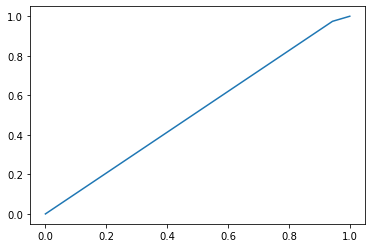

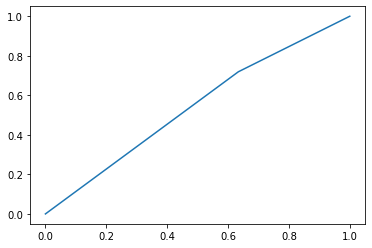

In [28]:
from matplotlib import pyplot
pyplot.plot(fpr,tpr)
pyplot.show()
pyplot.plot(fpr2,tpr2)
pyplot.show()

#### 1.3 K-fold cross validation

In [35]:
# DecisionTree
from sklearn.model_selection import KFold
k=10
kf=KFold(n_splits=k, random_state=None)
acc_score=[]
for train_index, test_index in kf.split(TXs):
    X_train,X_test=TXs.iloc[train_index,:],TXs.iloc[test_index,:]
    y_train,y_test=TY[train_index],TY[test_index]
     
    OntaskTreeModel.fit(X_train,y_train)
    pred_values=OntaskTreeModel.predict(X_test)
     
    acc=accuracy_score(pred_values,y_test)
    acc_score.append(acc)
     
avg_acc_score=sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.6782334384858044, 0.6737269040108157, 0.6750788643533123, 0.6723749436683191, 0.6825969341749324, 0.6735798016230838, 0.672678088367899, 0.6632100991884581, 0.6744815148782687, 0.6559963931469792]
Avg accuracy : 0.6721956981897872


In [36]:
# Bayes
from sklearn.model_selection import KFold
k=10
kf=KFold(n_splits=k, random_state=None)
acc_score=[]
for train_index, test_index in kf.split(TXs):
    X_train,X_test=TXs.iloc[train_index,:],TXs.iloc[test_index,:]
    y_train,y_test=TY[train_index],TY[test_index]
     
    OntaskNBModel.fit(X_train,y_train)
    pred_values=OntaskNBModel.predict(X_test)
     
    acc=accuracy_score(pred_values,y_test)
    acc_score.append(acc)
     
avg_acc_score=sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

D:\Learning\CU\Courses\EDM\ANACONDA\ANA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Learning\CU\Courses\EDM\ANACONDA\ANA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Learning\CU\Courses\EDM\ANACONDA\ANA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Learning\CU\Courses\EDM\ANACONDA\ANA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

accuracy of each fold - [0.6358720144209103, 0.5926092834610185, 0.5709779179810726, 0.6133393420459666, 0.6095581605049594, 0.6104598737601443, 0.5888187556357078, 0.6253381424706943, 0.6208295761947701, 0.5811541929666366]
Avg accuracy : 0.604895725944188


D:\Learning\CU\Courses\EDM\ANACONDA\ANA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### 1.4 Reflect on ACA2  
I tried to use NBmodel as a comparison, it seems to perform better than DecisionTreemodel while showing ROC curves, however, Treemodel has better accuracy while calculating the confusion matrix as well as using the k-fold method.  
But in conclusion, as showed by ROC curves, the two models both perform badly, as they both very close to no-skill curve. 
There must be problems exist at the very beginning of building this model, which is relevant to variables selection and calculation.

### 2. Clustering

In [45]:
# Import data from ACA3
import os
os.chdir('D:\\Learning\\CU\\Courses\\EDM\\ACA3')
import numpy as np
import pandas as pd
subsetcols=['UNITID','CURROPER','TUITFTE','COSTT4_A','COSTT4_P','NPT4_048_PUB','NPT4_048_PRIV','NPT4_048_PROG','PCTFLOAN','PCTPELL','C150_4_POOLED','C150_L4_POOLED','C200_4_POOLED','C200_L4_POOLED']
CSCdata=pd.read_csv("CollegeScorecard.csv",usecols=subsetcols)
CSCdata=CSCdata[CSCdata['CURROPER']==1]
CSCdata=CSCdata.fillna(0)
CSCdata['COSTT4']=CSCdata['COSTT4_A']+CSCdata['COSTT4_P']
CSCdata['NPT4_048']=CSCdata['NPT4_048_PUB']+CSCdata['NPT4_048_PRIV']+CSCdata['NPT4_048_PROG']
CSCdata['C150']=CSCdata['C150_4_POOLED']+CSCdata['C150_L4_POOLED']
CSCdata['C200']=CSCdata['C200_4_POOLED']+CSCdata['C200_L4_POOLED']
CSCdata=CSCdata.drop(['CURROPER','COSTT4_A','COSTT4_P','NPT4_048_PUB','NPT4_048_PRIV','NPT4_048_PROG','C150_4_POOLED','C150_L4_POOLED','C200_4_POOLED','C200_L4_POOLED'],axis=1)
CSCdata=CSCdata[(CSCdata['TUITFTE']>0)&(CSCdata['PCTPELL']>0)&(CSCdata['PCTFLOAN']>0)&(CSCdata['COSTT4']>0)&(CSCdata['NPT4_048']>0)&(CSCdata['C150']>0)&(CSCdata['C200']>0)]
upT=13065+1.5*(13065-4687)
upC=27395.5+1.5*(27395.5-14925)
upN=19120+1.5*(19120-9184.5)
CSCdata=CSCdata[(CSCdata['TUITFTE']<upT)&(CSCdata['COSTT4']<upC)&(CSCdata['NPT4_048']<upN)]
CSC=CSCdata.drop('UNITID',axis=1)
from sklearn import preprocessing
CSC_scale=preprocessing.scale(CSC)
CSC=pd.DataFrame(CSC_scale,columns=["TUITFTE","PCTPELL","PCTFLOAN","COSTT4","NPT4_048","C150","C200"])
from sklearn.decomposition import PCA
pcatry=PCA(n_components=7)
pcatry.fit(CSC)
pca3=PCA(n_components=3)
pca3.fit(CSC)
CSCr=pcatry.transform(CSC)

#### 2.1 Screen plot for PCA

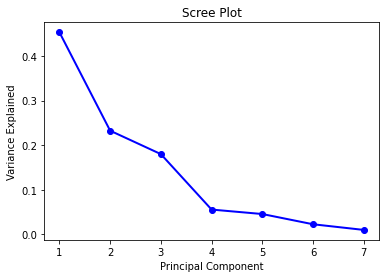

[0.45348354 0.23260232 0.18004121 0.05562753 0.04562095 0.02264761
 0.00997685]


In [44]:
import matplotlib.pyplot as plt
PC_values = np.arange(pcatry.n_components_) + 1
plt.plot(PC_values, pcatry.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print(pcatry.explained_variance_ratio_)

#### 2.2 Elbow method

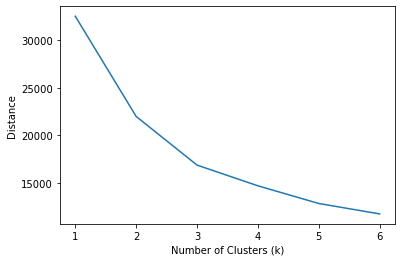

In [49]:
from sklearn.cluster import KMeans
clusters_range = [1, 2, 3, 4, 5, 6]
avg_distance=[]
for n in clusters_range:
  clusterer = KMeans(n_clusters = n).fit(CSCr)
  avg_distance.append(clusterer.inertia_)

plt.plot(clusters_range, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

#### 2.3 Reflect on ACA3  
It seems appropriate to select 3 PC in ACA3, as the forth PC drops drastically in the figure.  
I tried silhouette plot for different numbers of clusters in ACA3, and the results showed that the scores for 3,4,5 are very close (though the scores slowly decrease). The elbow method demonstrates a clearer result, which confirms that 3 clusters maybe better for the data.  
(However, I chose to use 5 clusters in ACA3, because it devides clearer for different types of schools.)